## Transfer Learning Inception V3 using Keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Please download the dataset from the below url

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [ ]:
len(folders)

0

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(4, activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/1_Cotton-Disease-Prediction-Deep-Learning-master (1)/Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/1_Cotton-Disease-Prediction-Deep-Learning-master (1)/Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-17-2d02736eff38>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
61/61 [==============================] - 492s 8s/step - loss: 3.9000 - accuracy: 0.7063 - val_loss: 0.4101 - val_accuracy: 0.8333
Epoch 2/20
61/61 [==============================] - 43s 713ms/step - loss: 0.5906 - accuracy: 0.8924 - val_loss: 1.3693 - val_accuracy: 0.7222
Epoch 3/20
61/61 [==============================] - 42s 688ms/step - loss: 0.5897 - accuracy: 0.8939 - val_loss: 0.0438 - val_accuracy: 1.0000
Epoch 4/20
61/61 [==============================] - 42s 691ms/step - loss: 0.6559 - accuracy: 0.9047 - val_loss: 0.2376 - val_accuracy: 0.9444
Epoch 5/20
61/61 [==============================] - 41s 670ms/step - loss: 0.8237 - accuracy: 0.8898 - val_loss: 0.0980 - val_accuracy: 0.9444
Epoch 6/20
61/61 [==============================] - 42s 689ms/step - loss: 0.7763 - accuracy: 0.9042 - val_loss: 3.7948e-06 - val_accuracy: 1.0000
Epoch 7/20
61/61 [==============================] - 44s 720ms/step - loss: 0.5948 - accuracy: 0.9252 - val_loss: 6.7337e-04 - val_accuracy: 

In [ ]:
import matplotlib.pyplot as plt

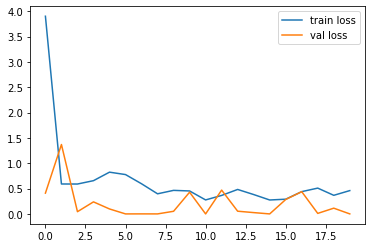

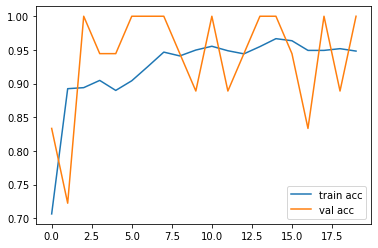

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [ ]:

y_pred = model.predict(test_set)


1/1 [==============================] - 4s 4s/step


In [ ]:
y_pred

array([[8.32103694e-20, 2.97489322e-07, 9.99999762e-01, 3.84695096e-25],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 3.34485624e-31],
       [1.30894843e-34, 1.67018462e-33, 4.88875278e-37, 1.00000000e+00],
       [0.00000000e+00, 2.58436783e-17, 0.00000000e+00, 1.00000000e+00],
       [6.57005723e-30, 0.00000000e+00, 1.00000000e+00, 1.11280235e-35],
       [6.99669218e-13, 2.14296648e-24, 1.00000000e+00, 1.18418220e-22],
       [1.00792635e-25, 1.00000000e+00, 9.79238033e-23, 7.84164678e-10],
       [4.61788367e-17, 1.87508064e-07, 1.40975575e-18, 9.99999762e-01],
       [1.00000000e+00, 5.80466770e-24, 3.56649054e-18, 6.71056525e-29],
       [7.38834348e-17, 2.48812717e-21, 1.00000000e+00, 2.03587300e-14],
       [2.92759681e-35, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 4.85530925e-33],
       [1.22533971e-12, 1.50556886e-10, 1.00000000e+00, 2.35884734e-08],
       [7.70443551e-14, 7.55001293e-15, 6.30016669e

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([2, 1, 3, 3, 2, 2, 1, 3, 0, 2, 1, 1, 2, 3, 1, 0, 0, 3])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_inception.h5')

In [ ]:
img_data

NameError: ignored

In [ ]:
img=image.load_img('/content/drive/MyDrive/1_Cotton-Disease-Prediction-Deep-Learning-master (1)/Datasets/test/diseased cotton plant/dd (41).jpg',target_size=(224,224))



In [ ]:
x=image.img_to_array(img)
x

array([[[ 97.,  82.,  61.],
        [ 71.,  59.,  37.],
        [ 98.,  83.,  62.],
        ...,
        [ 89., 149.,  63.],
        [ 91., 154.,  63.],
        [ 92., 154.,  68.]],

       [[ 63.,  54.,  37.],
        [ 54.,  46.,  33.],
        [ 68.,  59.,  42.],
        ...,
        [ 88., 150.,  64.],
        [ 89., 152.,  63.],
        [ 82., 144.,  58.]],

       [[ 48.,  38.,  26.],
        [ 58.,  49.,  34.],
        [ 76.,  67.,  50.],
        ...,
        [ 93., 153.,  67.],
        [ 82., 145.,  56.],
        [ 90., 150.,  64.]],

       ...,

       [[ 54.,  47.,  29.],
        [ 52.,  47.,  28.],
        [ 57.,  50.,  32.],
        ...,
        [ 38.,  38.,  26.],
        [ 36.,  34.,  22.],
        [ 50.,  46.,  34.]],

       [[ 58.,  51.,  35.],
        [ 34.,  31.,  14.],
        [ 50.,  44.,  28.],
        ...,
        [ 68.,  62.,  46.],
        [ 41.,  38.,  23.],
        [ 44.,  38.,  26.]],

       [[ 63.,  69.,  35.],
        [ 41.,  38.,  21.],
        [ 29.,  

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

1/1 [==============================] - 2s 2s/step


array([[7.4065709e-01, 2.2345192e-05, 9.7409857e-06, 2.5931090e-01]],
      dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 31ms/step


In [ ]:
a==1

array([False])

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.2.0'